<a href="https://colab.research.google.com/github/Nathan4523/eda-learn/blob/master/Li%C3%A7%C3%A3o_Montando_uma_frequ%C3%AAncia_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório de moradores simples

Relatório de moradores que moraram no prédio antigo em São Bernardo do Campo, onde que possuímos dados escasso, como idade e gêneros

### importações e configurações iniciais

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so

In [2]:
np.random.seed(42)
idades = np.random.randint(18, 65, 100)  # Gerando 100 idades entre 18 e 65 anos
generos = np.random.choice(['Masculino', 'Feminino'], size=100)  # Gerando 100 gêneros aleatórios

## Tabela de moradores

In [3]:
moradores = pd.DataFrame({
    'Idades': idades,
    'Generos': generos
})

moradores

,Idades,Generos
0,56,Feminino
1,46,Feminino
2,32,Masculino
3,60,Masculino
4,25,Masculino
...,...,...
95,24,Masculino
96,26,Feminino
97,41,Feminino
98,18,Masculino


Criando classes ideais

In [4]:
n = moradores.shape[0]

#encontrando a quantidade de classes ideal
k = 1 + (10 / 3) * np.log10(n)
k = int(k.round(0))
k

8

## Criando frequência de gêneros

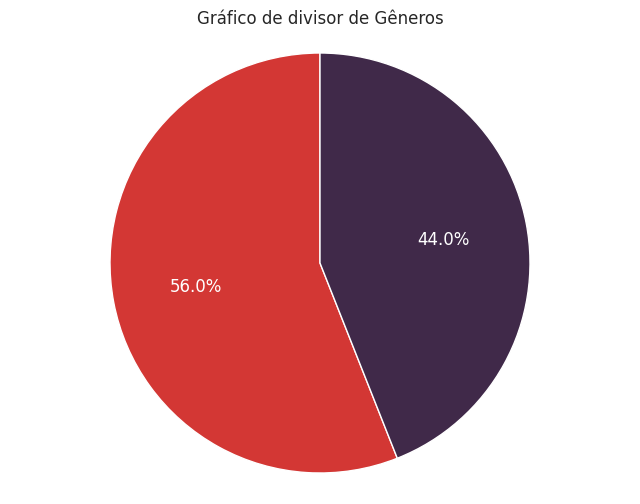

In [47]:
contagem_generos = moradores['Generos'].value_counts()
contagem_generos

#Criando um gráfico de pizza usando Matplotlib e Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid") # Ajustando o estilo do Seaborn

plt.pie(contagem_generos, labels=contagem_generos.index, autopct='%1.1f%%', startangle=90, colors=['#d33734', '#402949'], labeldistance=1, textprops={'color': 'white'})
plt.axis('equal')  # Garante que o gráfico de pizza seja circular

plt.title('Gráfico de divisor de Gêneros')
plt.show()

## Criando frequência de idades

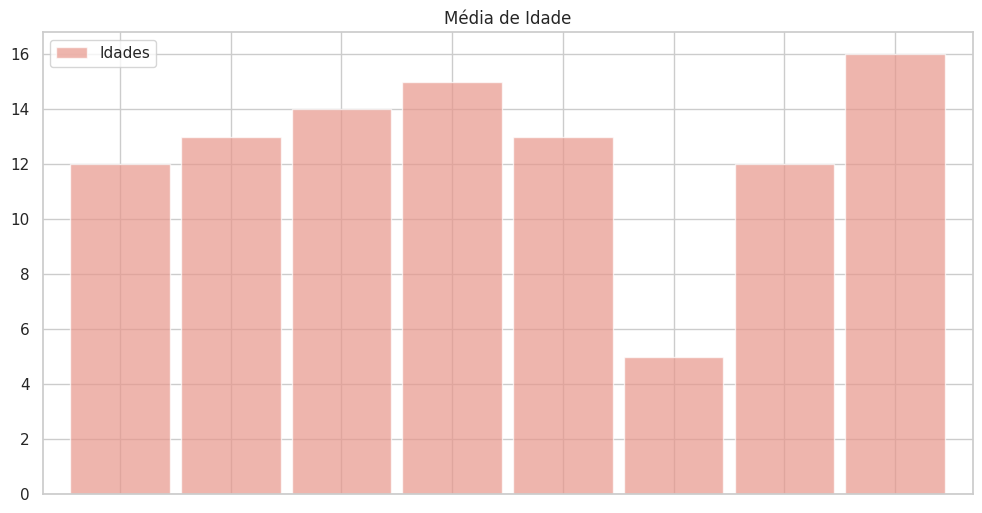

In [110]:
frequencia_idades = pd.value_counts(
    pd.cut(
        x = moradores['Idades'],
        bins = k,
        include_lowest = True
    ),
    sort = False
)

frequencia_idades = pd.DataFrame({
    'Idades': frequencia_idades
})

chart_frequencia_idades = frequencia_idades.plot.bar(
	width = 0.9,
	color = '#e8968b',
	alpha = 0.7,
	figsize= (12, 6)
)

chart_frequencia_idades.set_xticklabels([])

plt.title('Média de Idade')

# Exibindo o gráfico
plt.show()

### Extraindo médias simples

In [107]:
idades = moradores['Idades']

media_idade_geral = idades.mean()
round(media_idade_geral)

idade_max = idades.max()
idade_min = idades.min()

tabela_resultados = pd.DataFrame({
    'Media das idades': round(media_idade_geral),
    'Idade minima': idade_min,
    'Idade máxima': idade_max
}, index = [1])

tabela_resultados
#print('Idade min: {} - Idade max: {} - Idade Média: {}'.format(idade_min, idade_max, round(media_idade_geral)))

,Media das idades,Idade minima,Idade máxima
1,41,18,64


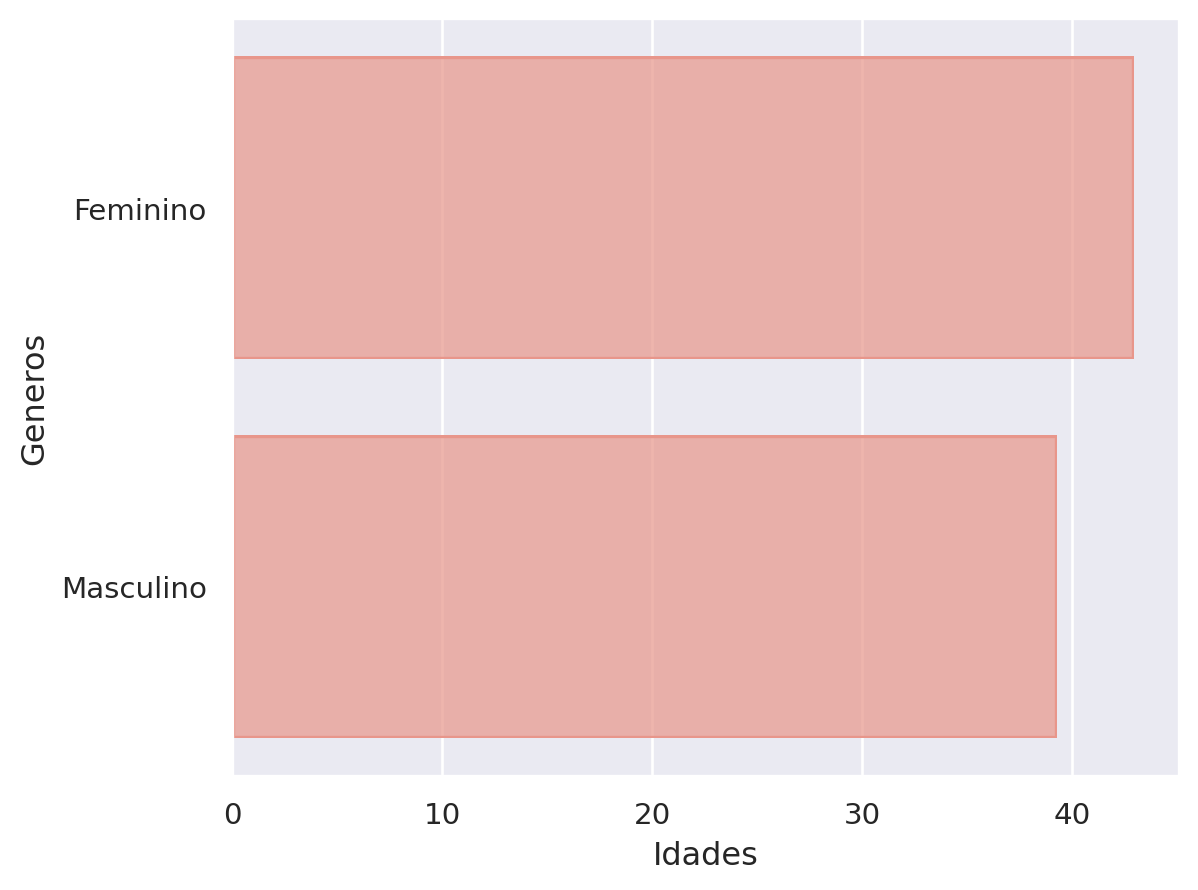

In [97]:
media_idades_por_generos = moradores.groupby('Generos')['Idades'].mean().reset_index() #necessário resetar os index para ele montar um novo dataframe

so.Plot(media_idades_por_generos["Idades"], media_idades_por_generos["Generos"]).add(so.Bar(color='#e8968b'))